# (4) Perceptrons for multivariate linear regression and for classification

## introduction to machine learning for materials science

In the previous [section](https://github.com/ricogutzler/MPI-FKF-ml4ms/blob/master/3_perceptron_regressor.ipynb) a simple perceptron model was used for linear regression, i.e. finding $w$ and $b$ for $y=w \cdot X + b$. It is straight forward to modify the model for multivariate linear regression $y = w_1 \cdot X_1 + w_2 \cdot X_2 + \cdots + w_n \cdot X_n + b$, in matrix notation $ y = \mathbf{w}^T \mathbf{X} + \mathbf{b} $.

More information can be found [here](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/) and [here](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html), from where the following code is adapted. 

For the case of two independent variables, $X_1$ and $X_2$, the perceptron will look like in the following figure.

<br>
<img src="./images/perceptron_multivar_LR.svg" width="400" />
<br>

Again, the activation function has been left out. Below is a slighty modified version of the previous perceptron regressor code that works for multivariate regression and wil be used to find a linear fit to a 2D dataset.

Apart from regression problems, neural networks can be used for classification. Imagine a 2D dataset $\mathbf{X}$, in which each data point belongs to one class. For example, $X_1$ could be the valence band, $X_2$ the conduction band, then the data can be separated into the two classes conductor and insulator. Attributing a $0$ for the conductor class and a $1$ to the insulator class, $y$ will be a vector with entries $0$ or $1$. Let's assume there are no semiconductors in the dataset and that datapoints belonging to the conductor class cluster rather close together and at a certain distance the insulator class datapoints cluster. This dataset is linearly separable, i.e. a hyperplane can be drawn such that it devides the two classes. A perceptron can learn parameters of such a plane that separates the two cluster. This will be shown further below in a second example for a model dataset.

The regressor percetptron needs to be adjust to be able to do classification. The output of the perceptron cannot be a continous function but should map to the values $0$ and $1$, ideally without any intermediate values. This is achieved by using an activation function $A(Z)$, with $Z = \sum_{i=1}^n w_i \cdot x_i + b$. The Heavyside step function would do the trick perfectly but has shortcomings that inhibts its use later on for other learning rules. A sigmoid function $f(x) = [1+\exp{(-x)}]^{-1}$ works similarly well, returning $\approx 1$ for large positive values of the argument and $\approx 0$ for large negative values of the argument. 



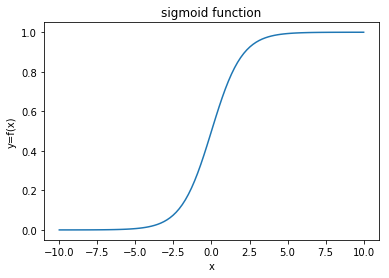

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.title('sigmoid function')
plt.xlabel('x')
plt.ylabel('y=f(x)')

plt.show()

The weighted sum calculated in the neuron is fed as argument into the sigmoid activation function. Weights are optimized such that the input data $X$ is mapped to a region where the sigmoid function is either close to $1$ or close to $0$, thus attributing the input data $X$ to one of the two categories. The perceptron looks similar to the following image with two output neurons, one for class $0$ and one for class $1$. Thus, the neural 'network' consists of the input layer (blue) with a number of neurons equal to the number of independent variables in the data set, one 'middle' neuron (green), which performs the weighted sum and the calculation of the activation function, and the ouput layer with two neurons (orange).

<br>
<img src="./images/perceptron_multivar_class.svg" width="400" />
<br>

Calculating the ouput is a tiny bit more involved than just passing the weighted sum through the sigmoid function for classification but this will be explained further below in the text. 

First we start with 2D linear regression with the perceptron. The following code cell defines some already known functions and two new ones, the sigmoid (activation) function, and one function that samples the output from the activation function and maps it to the binary state $0$ or $1$. These two functions will only be required for the classification problem.

In [2]:
#defining helper functions for later use

import numpy as np

#the function 'initialize_weights' sets the parameters w, b to random number close to zero
#slightly modified, the weight vector w is now defined as a column vector.

def initialize_weights(dim):
    np.random.seed()
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

#the function 'forward' calculates w*X+b, the weighted sum, which ideally should be equal to y.
#also slightly modified, before calculating the dot product of w and X, w needs to be transposed into a row vector

def forward(X_,w_,b_):
    Z = np.dot(w_.T,X_)+b_
    return Z

#using the Sigmoid function as activation function
#this function is new and will be used in the classifier perceptron

def activation(Z):
    A = 1/(1+np.exp(-Z))
    return A

#a function that maps an input to the binary classifier 0 or 1
#since the output of the sigmoid function is not strictly 0 or 1, we pass it through this function
#if the output of the sigmoid function is closer to zero, then 0 is returned. if it is closer to one, 1 is returned.
def predict(A):
    pred = 1.0 if A >= 0.5 else 0.0
    return pred

The next code is the somewhat modified version of the perceptron of the previous section. It can now perform regression analysis on multivariate data. 

In [3]:
def perceptron_regressor(X, y, eta, n_epochs):
    
    #first thing is to initialize the parameter w and b.
    #this is done calling the external function 'initialize_weights'
    
    w, b = initialize_weights(X.shape[1])
    
    #loop over the number of training cylces (n_epochs)
    for epoch in range(n_epochs):
        sum_error = 0.0
        
        #loop over all datapoints
        for i in range(X.shape[0]):
            
            #calling the prediction function 'forward' which calculates w*X+b and storing this in the variable 'prediction'
            predicted_value = forward(X[i], w, b)
            
            #calculating the prediciton error as the difference between the datapoint y and the estimate (w*X+b) 
            error = y[i]-predicted_value
            
            #calculating the total error as the sum of squared error of each datapoint
            sum_error = sum_error + error**2
            
            #the follwoing lines are the learning part, where the parameter w & b get updated.
            #according to Rosenblatt's rules, b and w get updated once in each epoch for each data point.
            #the for loop over j cycles through the dimension of the data so that each entry of the weight vector is updated.
            
            b = b + eta * error
            for j in range(X.shape[1]):
                w[j] = w[j] + eta * error * X[i][j]
                
            #end of learning section    
                
        #printing the total error of each epoch        
        print('>epoch=%d, error=%.3f' % (epoch, sum_error))
        
    return w, b

    #the updated/learned weights w & b are returned and describe a linear fit to the input data

To test the perceptron for multivariate linear regression, let's generate a 2D dataset in which $y=f(X1,X2)=a1 \cdot X1+a2 \cdot X2 + b$ depends linearly on $X1$ and $X2$.

In [4]:
#declaring parameters
a1 = 5
a2 = -3
b = 2

mu, sigma = 0, 1

#generate datapoints on a grid
X1,X2 = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX1 = X1.flatten()
XX2 = X2.flatten()

#make some noise
noise1 = np.random.normal(mu, sigma, XX1.shape)
noise2 = np.random.normal(mu, sigma, XX1.shape)

#generate the input matrix X with noise
X = np.column_stack((XX1+noise1,XX2+noise2))

#define y=f(X1,X2)
y = a1*X[:,0]+a2*X[:,1]+b

Use the *perceptron_regressor* function to fit a plane to the dataset. Few epochs are required to reduce the error significantly and to find good estimates for the parameter $a1$, $a2$, and $b$.

In [5]:
eta = 0.01
n_epochs = 10

weights = perceptron_regressor(X, y, eta, n_epochs)
print("w = " + str(weights[0]) + ", b = " + str(weights[1]))

>epoch=0, error=2063.075
>epoch=1, error=7.412
>epoch=2, error=0.703
>epoch=3, error=0.065
>epoch=4, error=0.006
>epoch=5, error=0.001
>epoch=6, error=0.000
>epoch=7, error=0.000
>epoch=8, error=0.000
>epoch=9, error=0.000
w = [[ 4.99999886]
 [-2.99999749]], b = [1.99999166]


Plot the data points and the calculated fitting plane.

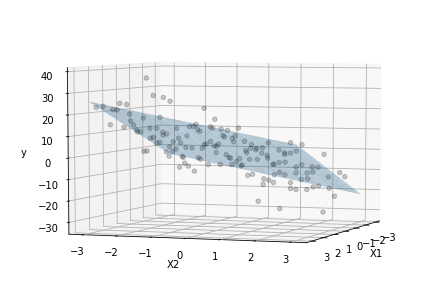

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plane(x1,x2, a1, a2, b):
    Z = a1*x1 + a2*x2 + b
    return Z

x_ = np.linspace(-3, 3, 30)
y_ = np.linspace(-3, 3, 30)

x2_, y2_ = np.meshgrid(x_, y_)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X1, X2, y, 'o', c=('black'), alpha=0.2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

ax.plot_surface(x2_, y2_, plane(x2_, y2_, weights[0][0], weights[0][1], weights[1]), rstride=1, cstride=1, alpha=0.3)

#change the two values here to rotate the figure
ax.view_init(5, 20)

plt.show()

## Classification

Now we adjust the perceptron for classification problems. The idea in a classification is to take a vector $\mathbf{X}$ and find out to which of several classes encoded in $\mathbf{y}$ it belongs to, see the above description about whether a material is conductor or an insulator depending on the valance and conduction band (although this is a trivial problem). The main difference to the regressor perceptron is that in addition to calling the forward function to calculate the weighted sum, this sum now is passed as argument to the activation function, and subsequently to the *predict* function (see further above for details). This maps the input to either $0$ or $1$. The learning rule, etc., remain unchanged.

In [7]:
def perceptron_classifier(X, y, eta, n_epochs):
    
    #first thing is to initialize the parameter w and b.
    #this is done calling the external function 'initialize_weights'
    
    w, b = initialize_weights(X.shape[1])
    
    #loop over the number of training cylces (n_epochs)
    for epoch in range(n_epochs):
        sum_error = 0.0
        
        #loop over all datapoints
        for i in range(X.shape[0]):
            
            #calling the prediction function 'forward' which calculates w*X+b and storing this in the variable 'prediction'
            predicted_value = predict(activation(forward(X[i], w, b)))
            
            #calculating the prediciton error as the difference between the datapoint y and the estimate (w*X+b) 
            error = y[i]-predicted_value
            
            #calculating the total error as the sum of squared error of each datapoint
            sum_error = sum_error + error**2
            
            #the follwoing lines are the learning part, where the parameter w & b get updated.
            #according to Rosenblatt's rules, b and w get updated once in each epoch for each data point
            #the for loop over j cycles through the dimension of the data, here 2 since we have y=f(x1,x2)
            
            b = b + eta * error
            for j in range(X.shape[1]):
                w[j] = w[j] + eta * error * X[i][j]
                
            #end of learning section    
                
        #printing the total error of each epoch        
        print('>epoch=%d, error=%.3f' % (epoch, sum_error))
        
    return w, b

For the perceptron to work as a classifier, the data points need to be well separated, and in addition separable by a hyperplane. I didn't find any obvious data in the gdb9 data set we looked at before, and thus we will use another dataset. 

We will use the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which can be downloaded [here](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). It contains data of three species of *Iris*, two dimensions for two different leaves of the flower (sepal and petal), and the type of flower.

In [8]:
import pandas as pd

iris_header = ["Sepal length", "Sepal width", "Petal length", "Petal width", "Iris type"]

#pandas can download files from the internet directly into a dataframe. 
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=iris_header)

#structure of the dataframe
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Iris type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


the scatter matrix plot helps to get a feeling for the data. Since *pandas* doesn't offer a straigt forward way to color the scatter plots, the alternative [*seaborn*](https://seaborn.pydata.org/) package is used.

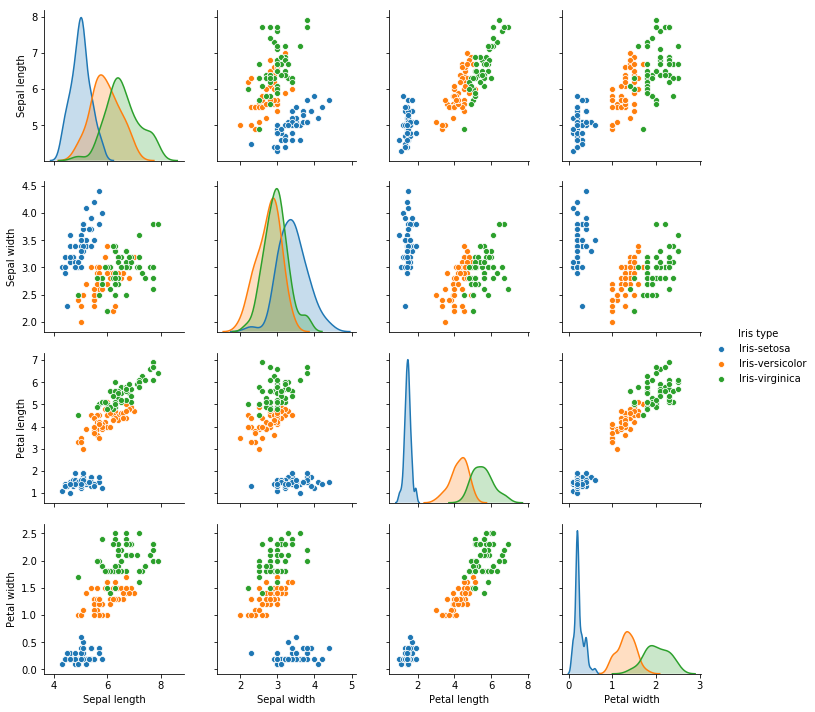

In [9]:
import seaborn as sns

#use the last column of the dataframe to color the datapoints. 
#this helps to identify if different Iris types cluster in certain regions of the graph.
sns.pairplot(df, hue="Iris type")

As described above, only well-separable data can be classified by the perceptron. In the plot petal length vs. petal width, the Iris setosa (blue) forms one cluster of data points, and Iris versicolor (orange) and Iris virginica (green) two other overlapping cluster. If we focus on the Iris setosa and Iris versicolor, then the perceptron should find a line that separates both cluster.

In [10]:
# define y: setosa receives the label 0, versicolor is labeled 1. 
#the iris virginica occupies the entries 101-150 and are left out
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# define X: petal length and petal width
X = df.iloc[0:100, [2,3]].values

Now we can use the above defined *perceptron_classifier* function to calculate values of $w$ and $b$ that define a plane separating the two cluster.

In [11]:
eta = 0.1
n_epochs = 10

weights2 = perceptron_classifier(X, y, eta, n_epochs)
print("w = " + str(weights2[0]) + ", b = " + str(weights2[1]))

>epoch=0, error=1.000
>epoch=1, error=3.000
>epoch=2, error=0.000
>epoch=3, error=0.000
>epoch=4, error=0.000
>epoch=5, error=0.000
>epoch=6, error=0.000
>epoch=7, error=0.000
>epoch=8, error=0.000
>epoch=9, error=0.000
w = [[0.05327093]
 [0.0803109 ]], b = -0.2


Since this is a small data set, we can check one-to-one if the classification is correct for each sample. This can be achieved by plotting the expected value of $y$ and the predicted value $A(\sum_{i=1}^2 w_i \cdot x_i + b)$. For large datasets this doesn't make much sense, though.

In [12]:
for i in range(len(y)):
    print("expected: " + str(y[i]) + " , predicted " + str(predict(activation(weights2[0][0]*X[i][0] + weights2[0][1]*X[i][1] + weights2[1]))))

expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predicted 0.0
expected: 0 , predic

A 3D plot helps to visualize how the calculated weights span a plane separating the data point clusters.

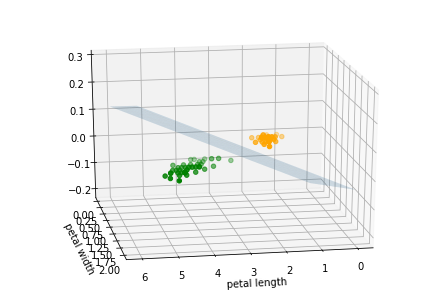

In [13]:
def plane(x1,x2):
    Z = weights2[0][0]*x1 + weights2[0][1]*x2 + weights2[1]
    return Z

x_ = np.linspace(0, 6, 30)
y_ = np.linspace(0, 2, 30)

x2_, y2_ = np.meshgrid(x_, y_)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[0:50,0], X[0:50,1], 0, 'o', c=('orange'))
ax.scatter(X[51:100,0], X[51:100,1], 0, 'o', c=('green'))
ax.plot_surface(x2_, y2_, plane(x2_, y2_), rstride=1, cstride=1, alpha=0.2)
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')



ax.view_init(20, 80)

It is also instructive to visualize the projection onto the x,y-plane. The line where the decision hyperplane cuts through the x,y-plane marks the decision boundary that separates both Iris species.

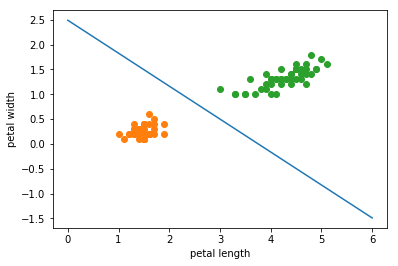

In [14]:
xtest = np.linspace(0,6,10)
ytest = -1/weights2[0][1] * (weights2[0][0]*xtest + weights2[1])

plt.plot(xtest,ytest)
plt.plot(X[0:50,0], X[0:50,1], 'o')
plt.plot(X[51:100,0], X[51:100,1], 'o')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()